### Naive Bayes Classification of Iris

The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository. It includes three iris species with 50 samples each as well as some properties about each flower. 
![](L7-img/iris.png)

| Dataset             | Iris
|---------------------|-----------------------------------|
| Number of Instances | 150 (50 per class) |
| Number of Attributes | 4 numeric                        |
| Attribute            | Sepal length/cm               |
| Attribute            | Sepal width/cm                |
|  Attribute           | Petal length/cm               |
|  Attribute           | Petal width/cm                |
| class                | Iris-Setosa                      |
| class                | Iris-Versicolour                 |
| class                | Iris-Virginica                   |







In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
import seaborn as sns

# import some data to play with
iris = datasets.load_iris()
column_names = iris.feature_names
iris.data[:,:]

Matplotlib is building the font cache; this may take a moment.


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

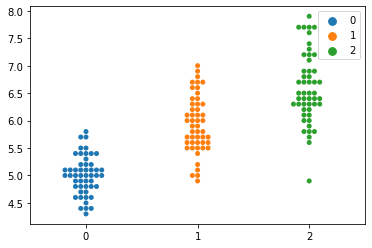

In [2]:
X = iris.data[:, 0]  # we only take the first feature
y = iris.target
X = np.squeeze(X)
#plt.figure(figsize=(12,4))
ax=sns.swarmplot(x=y,y=X,hue=y)

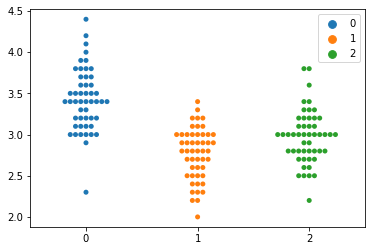

In [3]:
X = iris.data[:,1]  # we only take the 2nd feature
y = iris.target
X = np.squeeze(X)
#plt.figure(figsize=(12,4))
ax=sns.swarmplot(x=y,y=X,hue=y)
 

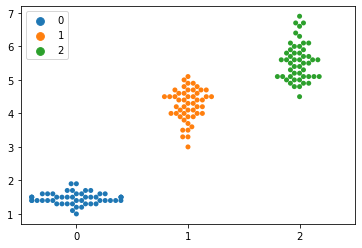

In [4]:
X = iris.data[:,2]  # we only take the 3rd feature
y = iris.target
X = np.squeeze(X)
#plt.figure(figsize=(12,4))
ax=sns.swarmplot(x=y,y=X,hue=y)

### Question
1. What can you say about the two features plotted above with regards to the use of it for classification? (Hint: can you use them for classification?)

### Answer
You can use the first and third features to classify, because it can be seen from the figure that the levels of these three types are the highest in class2, then class1, and finally class0

### Naive Bayes Classifier




We want to calculate this:

$P(y|X) = \frac{P(X|y)P(y)}{P(X)}$

Where y is the class variable and X is the feature vector of size N. N tells us how many different types of X attributes there are - eg sepal width, sepal length, etc. 

So $P(y|X)$ would be the probability of class y given the X attribute (eg sepal length, sepal width). That is if we have an X attribute value , what is its probability for it belonging to class y=0, y=1, y=2. 

This is exactly what the classifier does, given whatever value of X, find out which class it most probably belongs to. 

We can find $P(y|X)$ by this formula (assuming that X attributes are all independent): 

$P(y|x_{1},..,x_{n}) = \frac{P(x_{1}|y)P(x_{2}|y) ... P(x_{n}|y)P(y)}{P(x_{1})P(x_{2})... P(x_{n})}$

Where $x_{1}$ is the sepal width attribute, $x_{2}$ is sepal length attribute, etc.

Can be rewritten as: 

$P(y|x_{1},..,x_{n}) =\frac{P(y)\prod_{i=1}^{n}{P(x_{i}|y)}} {P(x_{1})P(x_{2})... P(x_{n})}$

$P(y|x_{1},..,x_{n}) \propto P(y)\prod_{i=1}^{n}{P(x_{i}|y)}$

We just need to calculate $P(x_{i}|y)$

We call this approach **naive bayes** because it is naive to assume that the attributes are independent, i.e. the attributes do not influence each other. For example we assume that the petal length and width are not influenced by each other. Nevertheless this assumption works well in many cases. 

In order to make it easy to calculate $P(x_{i}|y)$ we put the continous data into discrete bins. To calculate the probability we simply count the number of data points in each bins per class. 

In this example because X is continous need to discretize it into bins. It makes it easier for us to calculate as we just need to count and divide them. 

NOTE: This is just a demo, there are better ways to deal with continuous values. 

So in our example the continous X values are put into 6 separate bins (or categories). You can try to see if more bins are better.

In [35]:
from sklearn import preprocessing
X = iris.data[:,2] #petal length
X = X.reshape(-1, 1)
enc = preprocessing.KBinsDiscretizer(n_bins=6, encode='ordinal').fit(X)
X_binned = enc.fit_transform(X)

[0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0.
 1. 0. 3. 3. 4. 2. 3. 3. 3. 2. 3. 2. 2. 2. 2. 3. 2. 3. 3. 2. 3. 2. 3. 2.
 4. 3. 2. 3. 3. 4. 3. 2. 2. 2. 2. 4. 3. 3. 3. 3. 2. 2. 3. 3. 2. 2. 2. 2.
 2. 2. 2. 2. 5. 4. 5. 5. 5. 5. 3. 5. 5. 5. 4. 4. 4. 4. 4. 4. 4. 5. 5. 4.
 5. 4. 5. 4. 5. 5. 3. 4. 5. 5. 5. 5. 5. 4. 5. 5. 5. 4. 3. 4. 5. 4. 4. 5.
 5. 4. 4. 4. 4. 4.]


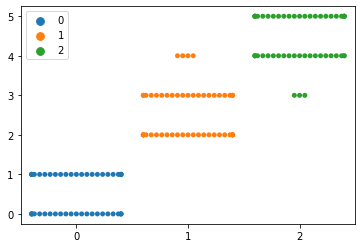

In [34]:
X_binned = X_binned.squeeze() # make 1-d array
print(X_binned)
ax=sns.swarmplot(x=y,y=X_binned,hue=y)

In [9]:
print(len(X_binned[y==0])) #count in class zero
print(X_binned[y==0])
print(X_binned[y==1])
print(X_binned[y==2])
enc.bin_edges_[0] #bin category

50
[0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0.
 1. 0.]
[3. 3. 4. 2. 3. 3. 3. 2. 3. 2. 2. 2. 2. 3. 2. 3. 3. 2. 3. 2. 3. 2. 4. 3.
 2. 3. 3. 4. 3. 2. 2. 2. 2. 4. 3. 3. 3. 3. 2. 2. 3. 3. 2. 2. 2. 2. 2. 2.
 2. 2.]
[5. 4. 5. 5. 5. 5. 3. 5. 5. 5. 4. 4. 4. 4. 4. 4. 4. 5. 5. 4. 5. 4. 5. 4.
 5. 5. 3. 4. 5. 5. 5. 5. 5. 4. 5. 5. 5. 4. 3. 4. 5. 4. 4. 5. 5. 4. 4. 4.
 4. 4.]


array([1.        , 1.5       , 2.63333333, 4.35      , 4.9       ,
       5.51666667, 6.9       ])

From the above data, we count how many data points are in X1 bins for each class Y. Fill up the last row.

| X1=0  | X1=1  | X1=2 | X1=3  | X1=4 |  X1=5  | Y  |
|-----|-----|----|-----|-----|-----|----|
| 24  | 26  | 0  |  0  |  0  |  0  | 0  |
| 0   | 0   | 25 | 21  |  4  |  0  | 1  |
| 0   | 0   | 0  |  3  |  22 | 25  | 2  |


Do the same with another attribute (see below)


In [11]:
X = iris.data[:,0] #sepal length
X = X.reshape(-1, 1)
enc = preprocessing.KBinsDiscretizer(n_bins=6, encode='ordinal').fit(X)
X_binned = enc.fit_transform(X)
X_binned = X_binned.squeeze() # make 1-d array
print(X_binned[y==0])
print(X_binned[y==1])
print(X_binned[y==2])
enc.bin_edges_[0] #bin

[1. 0. 0. 0. 1. 2. 0. 1. 0. 0. 2. 0. 0. 0. 3. 2. 2. 1. 2. 1. 2. 1. 0. 1.
 0. 1. 1. 1. 1. 0. 0. 2. 1. 2. 0. 1. 2. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0.
 1. 1.]
[5. 4. 5. 2. 4. 2. 4. 0. 4. 1. 1. 3. 3. 3. 2. 5. 2. 3. 3. 2. 3. 3. 4. 3.
 4. 4. 5. 5. 3. 2. 2. 2. 3. 3. 2. 3. 5. 4. 2. 2. 2. 3. 3. 1. 2. 2. 2. 3.
 1. 2.]
[4. 3. 5. 4. 4. 5. 0. 5. 5. 5. 4. 4. 5. 2. 3. 4. 4. 5. 5. 3. 5. 2. 5. 4.
 5. 5. 3. 3. 4. 5. 5. 5. 4. 4. 3. 5. 4. 4. 3. 5. 5. 5. 3. 5. 5. 5. 4. 4.
 3. 3.]


array([4.3, 5. , 5.4, 5.8, 6.3, 6.7, 7.9])

| X2=0  | X2=1  | X2=2 | X2=3  | X2=4 |  X2=5  | Y  |
|-----|-----|----|-----|-----|-----|----|
| 20  | 20  | 9  |  1  |  0  |  0  | 0  |
| 1   | 4   | 16 | 15  |  8  |  6  | 1  |
| 1   | 0   | 2  | 10  |  15 |  22 | 2  |



Lets say now i have a new specimen X1=2, X2=3, what is the most probable class?

To calculate $P(y|x_{1},..,x_{n}) \propto P(y)\prod_{i=1}^{n}{P(x_{i}|y)}$ 

We just look up the tables we have created:

$P(Y=0 | X1=2, X2=3)\propto (1/3)(0/50)(1/50)$

This is the probability of belonging to Class Y=0, given that the data we have is X1=2 and X2=3.

One of the values is zero, in case this we use a small value instead of zero so that the zero will not mask out other contribution from different attribute.

$P(Y=0 | X1=2, X2=3) \propto (1/3)(1/50)(1/50) = 0.00013$

### Question

1. Calculate the rest to find out which class is most probable for new specimen X1=2, X2=3
2. Calculate which class is most probable if the sepal length=5.1 and petal length=3.0 



### Answer
Q1.    
$P(Y=0 | X1=2, X2=3) \propto (1/3)(1/50)(1/50) = 0.00013$  
$P(Y=1 | X1=2, X2=3) \propto (1/3)(25/50)(15/50) = 0.04999$  
$P(Y=2 | X1=2, X2=3) \propto (1/3)(1/50)(10/50) = 0.0013$  
ans:class1  
Q2.  
X1=2,X2=1  
$P(Y=0 | X1=2, X2=1) \propto (1/3)(1/50)(20/50) = 0.0026$  
$P(Y=1 | X1=2, X2=1) \propto (1/3)(25/50)(4/50) = 0.0133$  
$P(Y=2 | X1=2, X2=1) \propto (1/3)(1/50)(1/50) = 0.0013$  
ans:class1  


Given data as below:

    @attribute outlook {sunny, overcast, rainy}
    @attribute temperature {high, low}
    @attribute humidity {high, low}
    @attribute windy {TRUE, FALSE}
    @class     play {yes, no}

    @data
    sunny,high,high,FALSE,no
    sunny,high,high,TRUE,no
    overcast,high,high,FALSE,yes
    rainy,low,high,FALSE,yes
    rainy,low,high,FALSE,yes
    rainy,low,low,TRUE,no
    overcast,low,low,TRUE,yes
    sunny,high,high,FALSE,no
    sunny,low,high,FALSE,yes
    rainy,high,high,FALSE,yes
    sunny,high,low,TRUE,yes
    overcast,high,high,TRUE,yes
    overcast,high,high,FALSE,yes
    rainy,high,high,TRUE,no


### Question 
1. Should i play if outlook=ovecast, temperate=low, humidity=high, windy=TRUE?

### ANSWER  
outlook  

|sunny| overcast| rainy | class  |total |
|-----|-----|----|-----|-----| 
| 2   | 4   | 3  |  yes|  9  |  
| 3   | 0   | 2  | no  |  5  |  

temperature  

|high| low | class  |total |  
|-----|-----|----|-----|  
| 5   | 4   | yes|  9  |  
| 4   | 1   | no |  5  |  

humidity  

|high| low | class  |total |  
|-----|-----|----|-----|  
| 7   | 2   | yes|  9  |  
| 4   | 1   | no |  5  |  

windy  

|high| low | class  |total |  
|-----|-----|----|-----|  
| 3   | 6   | yes|  9  |  
| 3   | 2   | no |  5  |  


P(YES|outlook=ovecast,temperate=low, humidity=high, windy=TRUE)=(9/14)*(4/9)*(4/9)*(7/9)*(3/9)=0.033  
P(NO|outlook=ovecast,temperate=low, humidity=high, windy=TRUE)=(5/14)*(1/5)*(1/5)*(4/5)*(3/5)=0.0068  
I should paly yes